In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [55]:
# read in raw FOA data 
df1 = pd.read_excel('./datasets/FOA data/Wind_part1.xlsx', usecols=[0,1,2])
df2 = pd.read_excel('./datasets/FOA data/Wind_part2.xlsx', usecols=[0,1,2], header=0)
M7_FOA = pd.concat([df1, df2], ignore_index=True)
M7_FOA.columns.values[1] = 'datetime'

In [54]:
# read in Ammonit data

# Base directory where folders with CSV files are located
base_directory = './datasets/Ammonit data/'

# Empty list to store DataFrames
all_data = []

# Iterate through all files in the directory and subdirectories
for root, dirs, files in os.walk(base_directory):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(root, file)

            # Process the data
            amm_df = pd.read_csv(file_path, usecols=[0, 1])
            amm_df.iloc[:, 0] = pd.to_datetime(amm_df.iloc[:, 0])
            amm_df['Unix time'] = amm_df.iloc[:, 0].apply(lambda x: int(x.timestamp() * 1000))

            # Append the processed DataFrame to the list
            all_data.append(amm_df)


# Concatenate all DataFrames in the list into one massive DataFrame
M7_Ammonit = pd.concat(all_data, ignore_index=True)
M7_Ammonit.columns.values[1] = 'Wind speed'
print(M7_Ammonit.head())




              datetime  Wind speed      Unix time
0  2021-10-01 00:00:00      1.9475  1633046400000
1  2021-10-01 00:10:00      2.1348  1633047000000
2  2021-10-01 00:20:00      1.6902  1633047600000
3  2021-10-01 00:30:00      1.6267  1633048200000
4  2021-10-01 00:40:00      1.7522  1633048800000


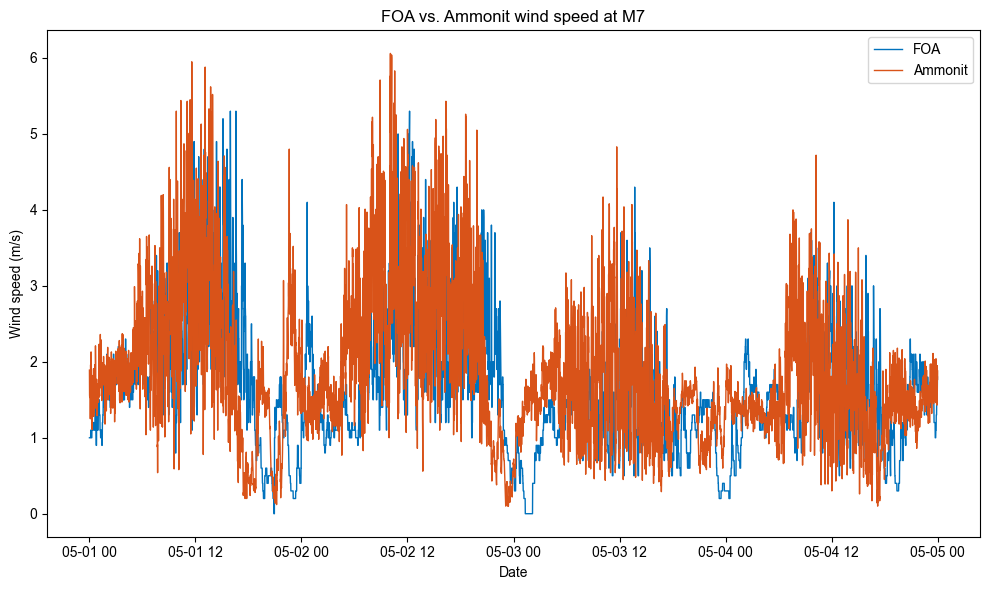

In [79]:
# Define the start and end dates for May 2023
# Convert start and end dates to datetime format
start_date = pd.to_datetime('2023-05-01')
end_date = pd.to_datetime('2023-05-05')

# Filter the dataframes for the date range of May 2023
M7_FOA_filtered = M7_FOA[(M7_FOA['datetime'] >= start_date) & (M7_FOA['datetime'] <= end_date)]
M7_Ammonit_filtered = M7_Ammonit[(M7_Ammonit['datetime'] >= start_date) & (M7_Ammonit['datetime'] <= end_date)]

# Plot the data
plt.rc('font', family='Arial')
plt.figure(figsize=(10, 6))

# Plot M7_FOA data (assuming we want to plot the 'Value' column for M7_FOA)
plt.plot(M7_FOA_filtered['datetime'], M7_FOA_filtered['wind_m7'], label='M7_FOA', color=(0, 0.4470, 0.7410), linewidth=1)

# Plot M7_Ammonit data (assuming we want to plot the 'Value' column for M7_Ammonit)
plt.plot(M7_Ammonit_filtered['datetime'], M7_Ammonit_filtered['Wind speed'], label='M7_Ammonit', color=(0.8500, 0.3250, 0.0980), linewidth=1)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Wind speed (m/s)')
plt.title('FOA vs. Ammonit wind speed at M7')
plt.legend(('FOA', 'Ammonit'))

# Show the plot
plt.tight_layout()
plt.show()


In [42]:
%reset -f